## *LIBRERIAS IMPORTADAS*

In [ ]:

#Librerias de Manipulacion de Datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocesamiento

from sklearn.preprocessing import PowerTransformer, QuantileTransformer, OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import VarianceThreshold
from sklearn.utils import resample


#Division de Datos
from sklearn.model_selection import train_test_split

# Librearias de Modelos

from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier



#METRICAS PARA COMPROBACIONES DE MODELOS

# Metricas Regresion:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error,mean_absolute_percentage_error, mean_squared_error
#Metricas Clasificacion:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix

# Encadenamiento de Modelos

from sklearn.pipeline import Pipeline


# Validacion Cruzada

from sklearn.model_selection import cross_validate,cross_val_score

#feature Selection

from sklearn.feature_selection import SelectKBest,f_classif,chi2, f_regression
from sklearn.cluster import KMeans




import tensorflow as tf
from tensorflow import keras
import random
from keras.utils import to_categorical
from sklearn.datasets import make_classification

In [2]:
df= pd.read_csv('AB_NYC_2019.csv')

In [3]:
#Eliminamos las columnas uqe no son utiles para el analisis
df.drop(['id','name','host_id','host_name','last_review'], axis=1, inplace=True)
df.head()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [4]:

# Rellenamos los valores nulos tanto en columnas numericas como categoricas

numerical_columns = df.select_dtypes(exclude=['object', 'category']).columns.to_list() 
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.to_list()

imputer_numerical = SimpleImputer(strategy='constant', fill_value=0)
np_numerical = imputer_numerical.fit_transform(df[numerical_columns]) 

imputer_categorical = SimpleImputer(strategy='constant', fill_value='others')
np_categorical = imputer_categorical.fit_transform(df[categorical_columns])

df_ok = pd.concat(
    [
        pd.DataFrame(np_numerical, columns=numerical_columns).reset_index(drop=True), 
        pd.DataFrame(np_categorical, columns=categorical_columns).reset_index(drop=True) 
    ],
    axis=1
)
df_ok.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,40.64749,-73.97237,149.0,1.0,9.0,0.21,6.0,365.0,Brooklyn,Kensington,Private room
1,40.75362,-73.98377,225.0,1.0,45.0,0.38,2.0,355.0,Manhattan,Midtown,Entire home/apt
2,40.80902,-73.94190,150.0,3.0,0.0,0.00,1.0,365.0,Manhattan,Harlem,Private room
3,40.68514,-73.95976,89.0,1.0,270.0,4.64,1.0,194.0,Brooklyn,Clinton Hill,Entire home/apt
4,40.79851,-73.94399,80.0,10.0,9.0,0.10,1.0,0.0,Manhattan,East Harlem,Entire home/apt


In [5]:
df_ok.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
dtype: int64

In [6]:
#sns.pairplot(df_ok)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


<Axes: xlabel='price', ylabel='Count'>

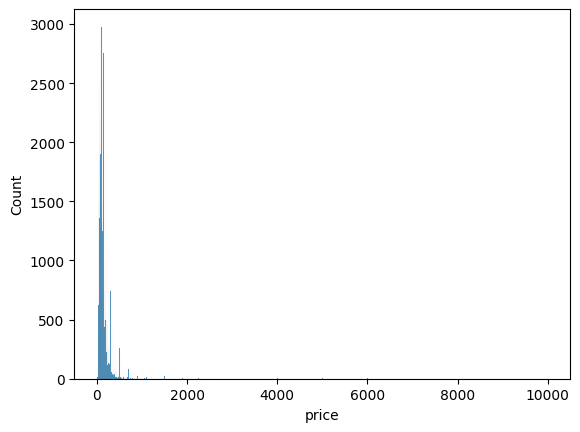

In [8]:
sns.histplot(df_ok['price'])

<Axes: ylabel='price'>

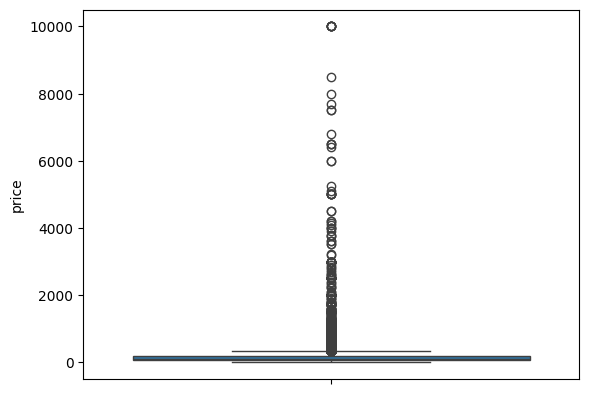

In [9]:
sns.boxplot(df_ok['price'])

<Axes: xlabel='room_type', ylabel='price'>

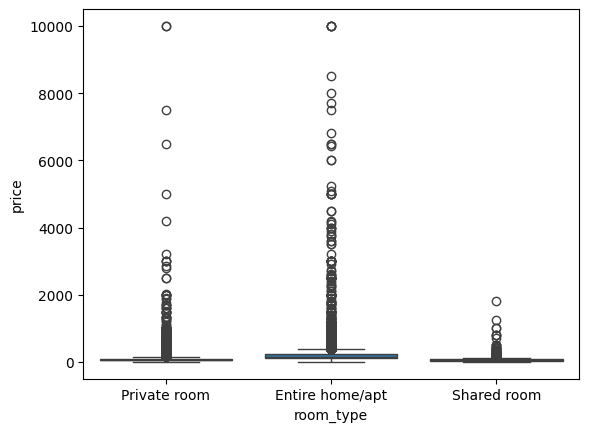

In [10]:
sns.boxplot(x='room_type', y='price', data=df_ok)

In [11]:
df_ok['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [12]:
df_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  float64
 3   minimum_nights                  48895 non-null  float64
 4   number_of_reviews               48895 non-null  float64
 5   reviews_per_month               48895 non-null  float64
 6   calculated_host_listings_count  48895 non-null  float64
 7   availability_365                48895 non-null  float64
 8   neighbourhood_group             48895 non-null  object 
 9   neighbourhood                   48895 non-null  object 
 10  room_type                       48895 non-null  object 
dtypes: float64(8), object(3)
memory usage: 4.1+ MB


<Axes: xlabel='neighbourhood_group', ylabel='price'>

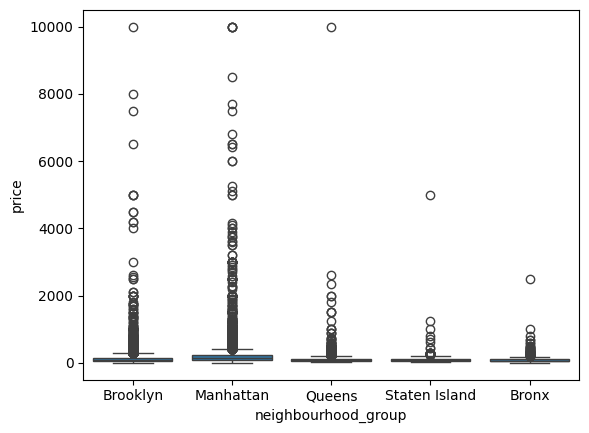

In [13]:
sns.boxplot(x='neighbourhood_group', y='price', data=df_ok)

<Axes: xlabel='minimum_nights', ylabel='price'>

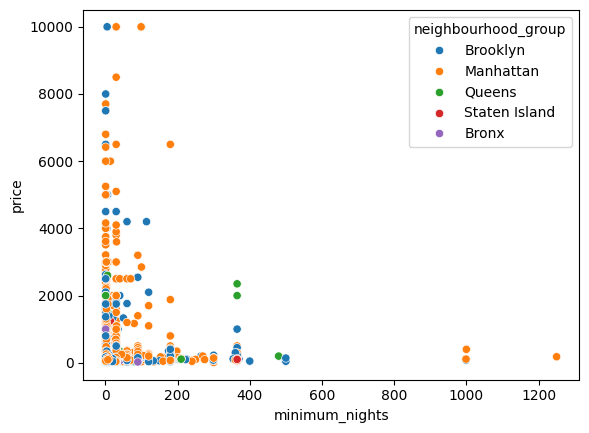

In [14]:
sns.scatterplot(x='minimum_nights', y='price', hue='neighbourhood_group', data=df_ok)

In [15]:
#convertir los datos categoricos a numericos par apoder trabajar en la regresion con todo el dataset sin problemas.
label_encoder = LabelEncoder()
df_ok['neighbourhood_group'] = label_encoder.fit_transform(df_ok['neighbourhood_group'])
df_ok['room_type'] = label_encoder.fit_transform(df_ok['room_type'])
df_ok['neighbourhood'] = label_encoder.fit_transform(df_ok['neighbourhood'])

df_ok.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,40.64749,-73.97237,149.0,1.0,9.0,0.21,6.0,365.0,1,108,1
1,40.75362,-73.98377,225.0,1.0,45.0,0.38,2.0,355.0,2,127,0
2,40.80902,-73.94190,150.0,3.0,0.0,0.00,1.0,365.0,2,94,1
3,40.68514,-73.95976,89.0,1.0,270.0,4.64,1.0,194.0,1,41,0
4,40.79851,-73.94399,80.0,10.0,9.0,0.10,1.0,0.0,2,61,0


In [16]:
df_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  float64
 3   minimum_nights                  48895 non-null  float64
 4   number_of_reviews               48895 non-null  float64
 5   reviews_per_month               48895 non-null  float64
 6   calculated_host_listings_count  48895 non-null  float64
 7   availability_365                48895 non-null  float64
 8   neighbourhood_group             48895 non-null  int64  
 9   neighbourhood                   48895 non-null  int64  
 10  room_type                       48895 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 4.1 MB


In [17]:
#plt.figure(figsize=(13,10))
#sns.heatmap(df_ok.corr(),cmap='coolwarm', annot=True)

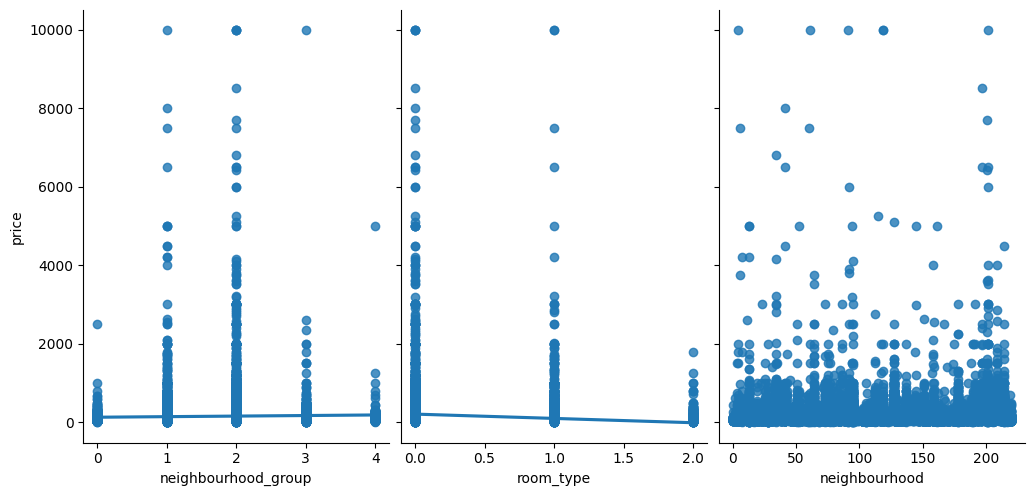

In [18]:
#Vemos que no hay correlacion entre las variables, por lo vamos a ver la columna price y otras para ver como podemos transformarlas para obtener mejores resultados.
sns.pairplot(df_ok, x_vars=['neighbourhood_group', 'room_type', 'neighbourhood'], y_vars=['price'], height=5, aspect=0.7, kind='reg')

#### Ajustamos algunos parámetros:  logaritmo de precio, eliminamos los outliers.

In [19]:
#Vamos a eliminar outliers y a transformar el precio para que se ajuste a una distribucion normal

df_ok['price'] = np.log1p(df_ok['price'])

<Axes: >

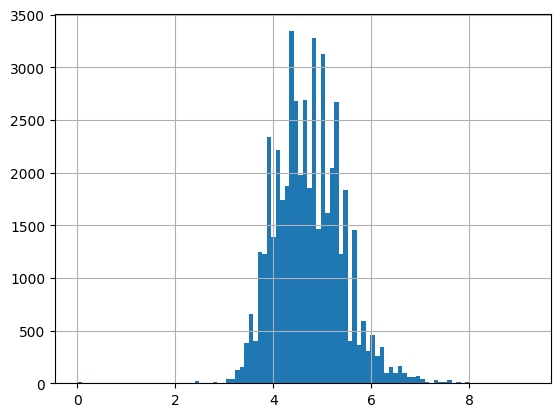

In [20]:
df_ok['price'].hist(bins=100)

In [21]:
#eliminamos los outliers de price
outliers = IsolationForest(contamination=0.10)
outliers = outliers.fit_predict(df_ok[['price']])
df_ok = df_ok[outliers == 1]

<Axes: ylabel='price'>

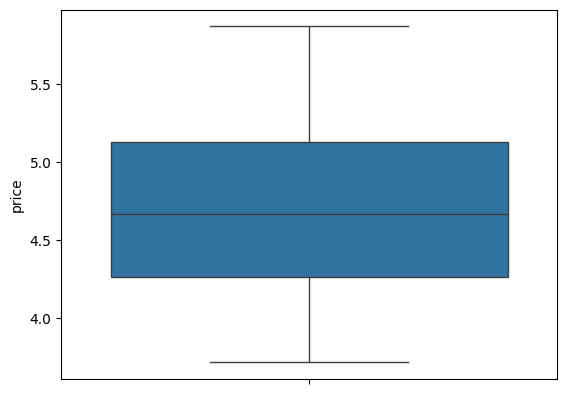

In [22]:
sns.boxplot(df_ok['price'])

In [23]:
df_ok['room_type'].value_counts()  

room_type
0    23207
1    20134
2      665
Name: count, dtype: int64

<Axes: xlabel='room_type', ylabel='price'>

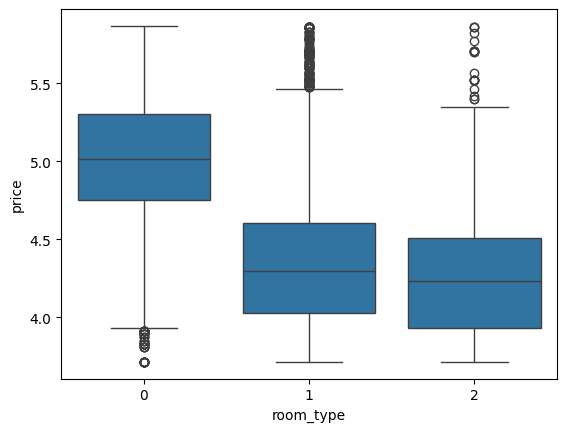

In [24]:
sns.boxplot(x='room_type', y='price', data=df_ok)

In [25]:
#eliminamos los outliers de price solo a las categorias 0 y 1 ya que la 2 tiene muy pocos valores
df_filtered = df_ok[df_ok['room_type'].isin([0, 1])].copy()
iso_forest = IsolationForest(contamination=0.35, random_state=42)
outliers = iso_forest.fit_predict(df_filtered[['price']])  # Asegúrate de usar una columna numérica relevante
df_filtered = df_filtered[outliers == 1]
df_other = df_ok[~df_ok['room_type'].isin([0, 1])]

df_ok = pd.concat([df_filtered, df_other])



<Axes: xlabel='room_type', ylabel='price'>

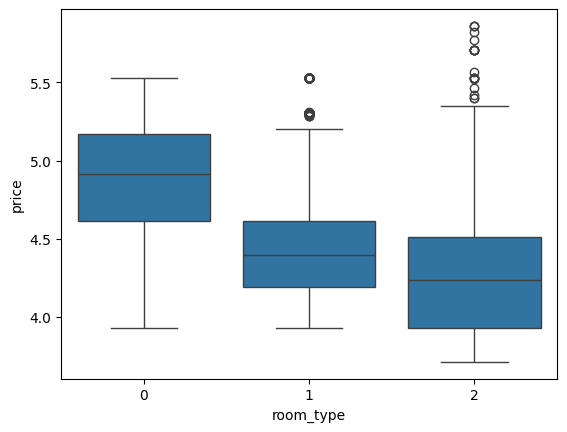

In [26]:
sns.boxplot(x='room_type', y='price', data=df_ok)

In [27]:
df_filtered = df_ok[df_ok['neighbourhood_group'].isin([0, 1])].copy()
iso_forest = IsolationForest(contamination=0.35, random_state=42)
outliers = iso_forest.fit_predict(df_filtered[['price']])  # Asegúrate de usar una columna numérica relevante
df_filtered = df_filtered[outliers == 1]
df_other = df_ok[~df_ok['room_type'].isin([0, 1])]

df_ok = pd.concat([df_filtered, df_other])

<Axes: xlabel='neighbourhood_group', ylabel='price'>

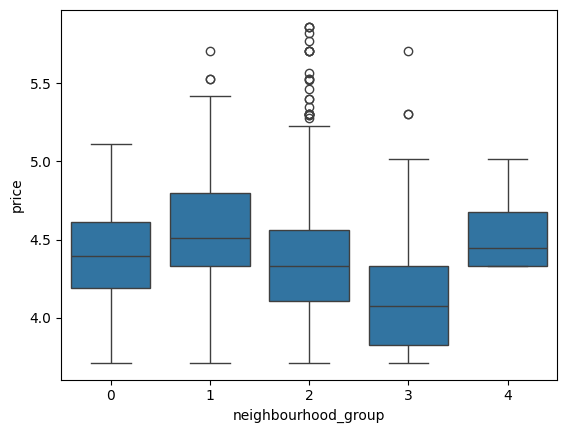

In [28]:
sns.boxplot(x='neighbourhood_group', y='price', data=df_ok)

In [29]:
#eliminamos outliers de minimum_nights

minimum_nights = IsolationForest(contamination=0.10)
minimum_nights = minimum_nights.fit_predict(df_ok[['minimum_nights']])
df_ok = df_ok[minimum_nights == 1]


<Axes: xlabel='minimum_nights', ylabel='price'>

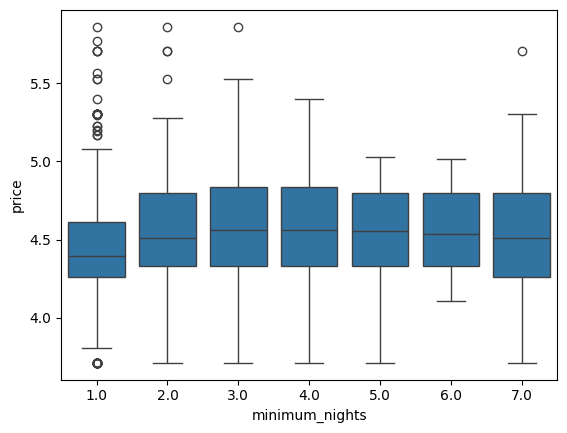

In [30]:
sns.boxplot(x='minimum_nights', y='price', data=df_ok)

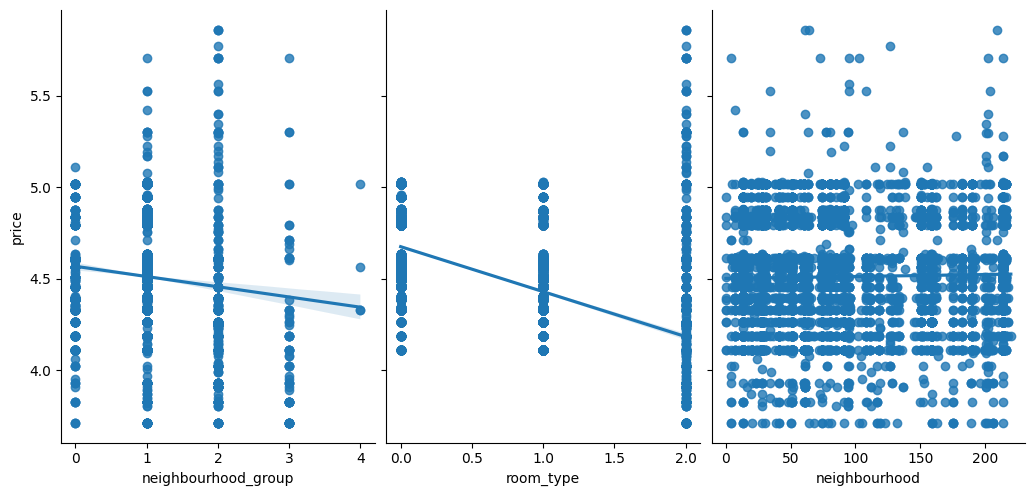

In [31]:
sns.pairplot(df_ok, x_vars=['neighbourhood_group', 'room_type', 'neighbourhood'], y_vars=['price'], height=5, aspect=0.7, kind='reg')

<Axes: >

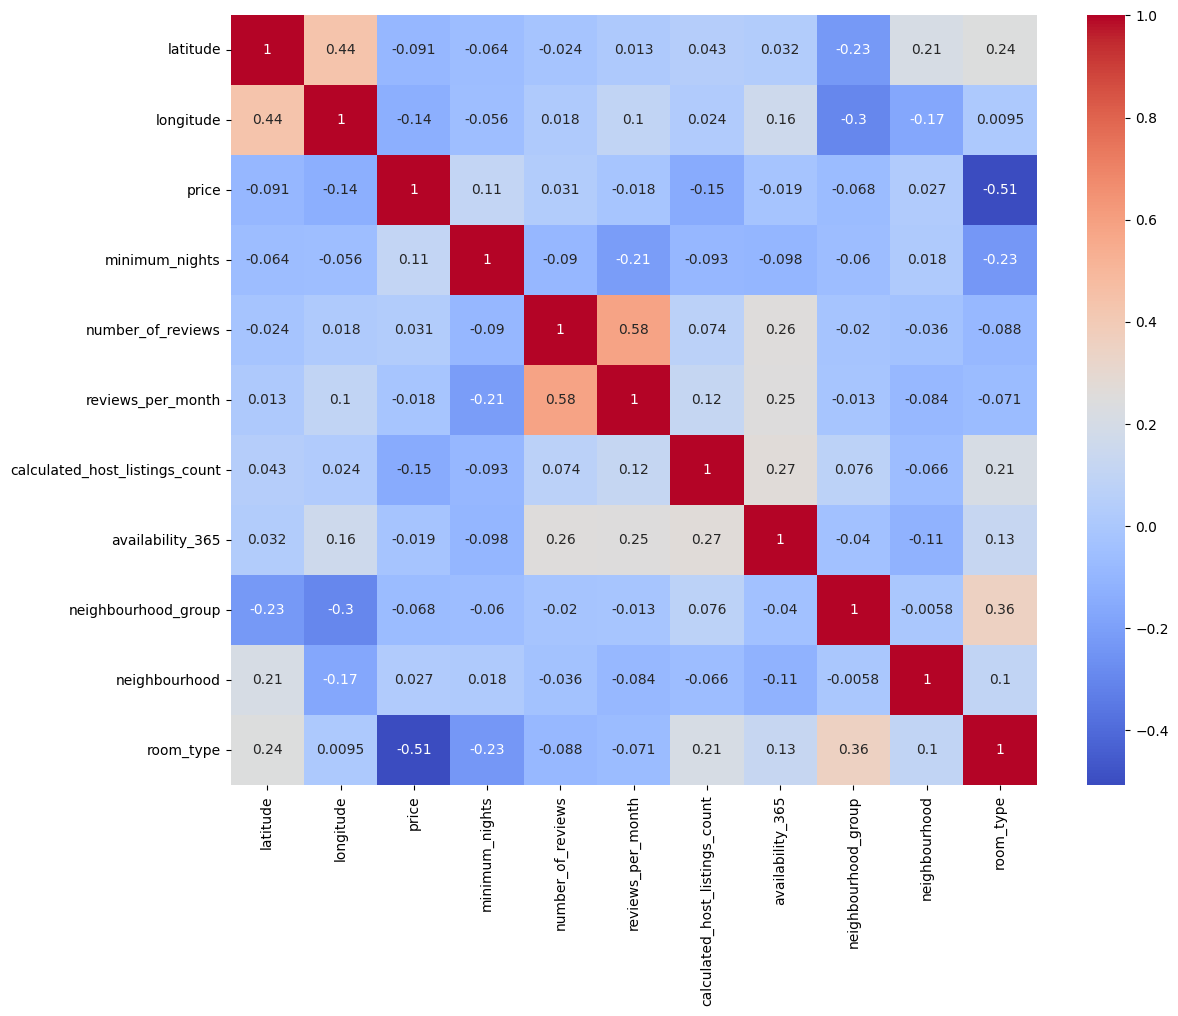

In [32]:
plt.figure(figsize=(13,10))
sns.heatmap(df_ok.corr(),cmap='coolwarm', annot=True)

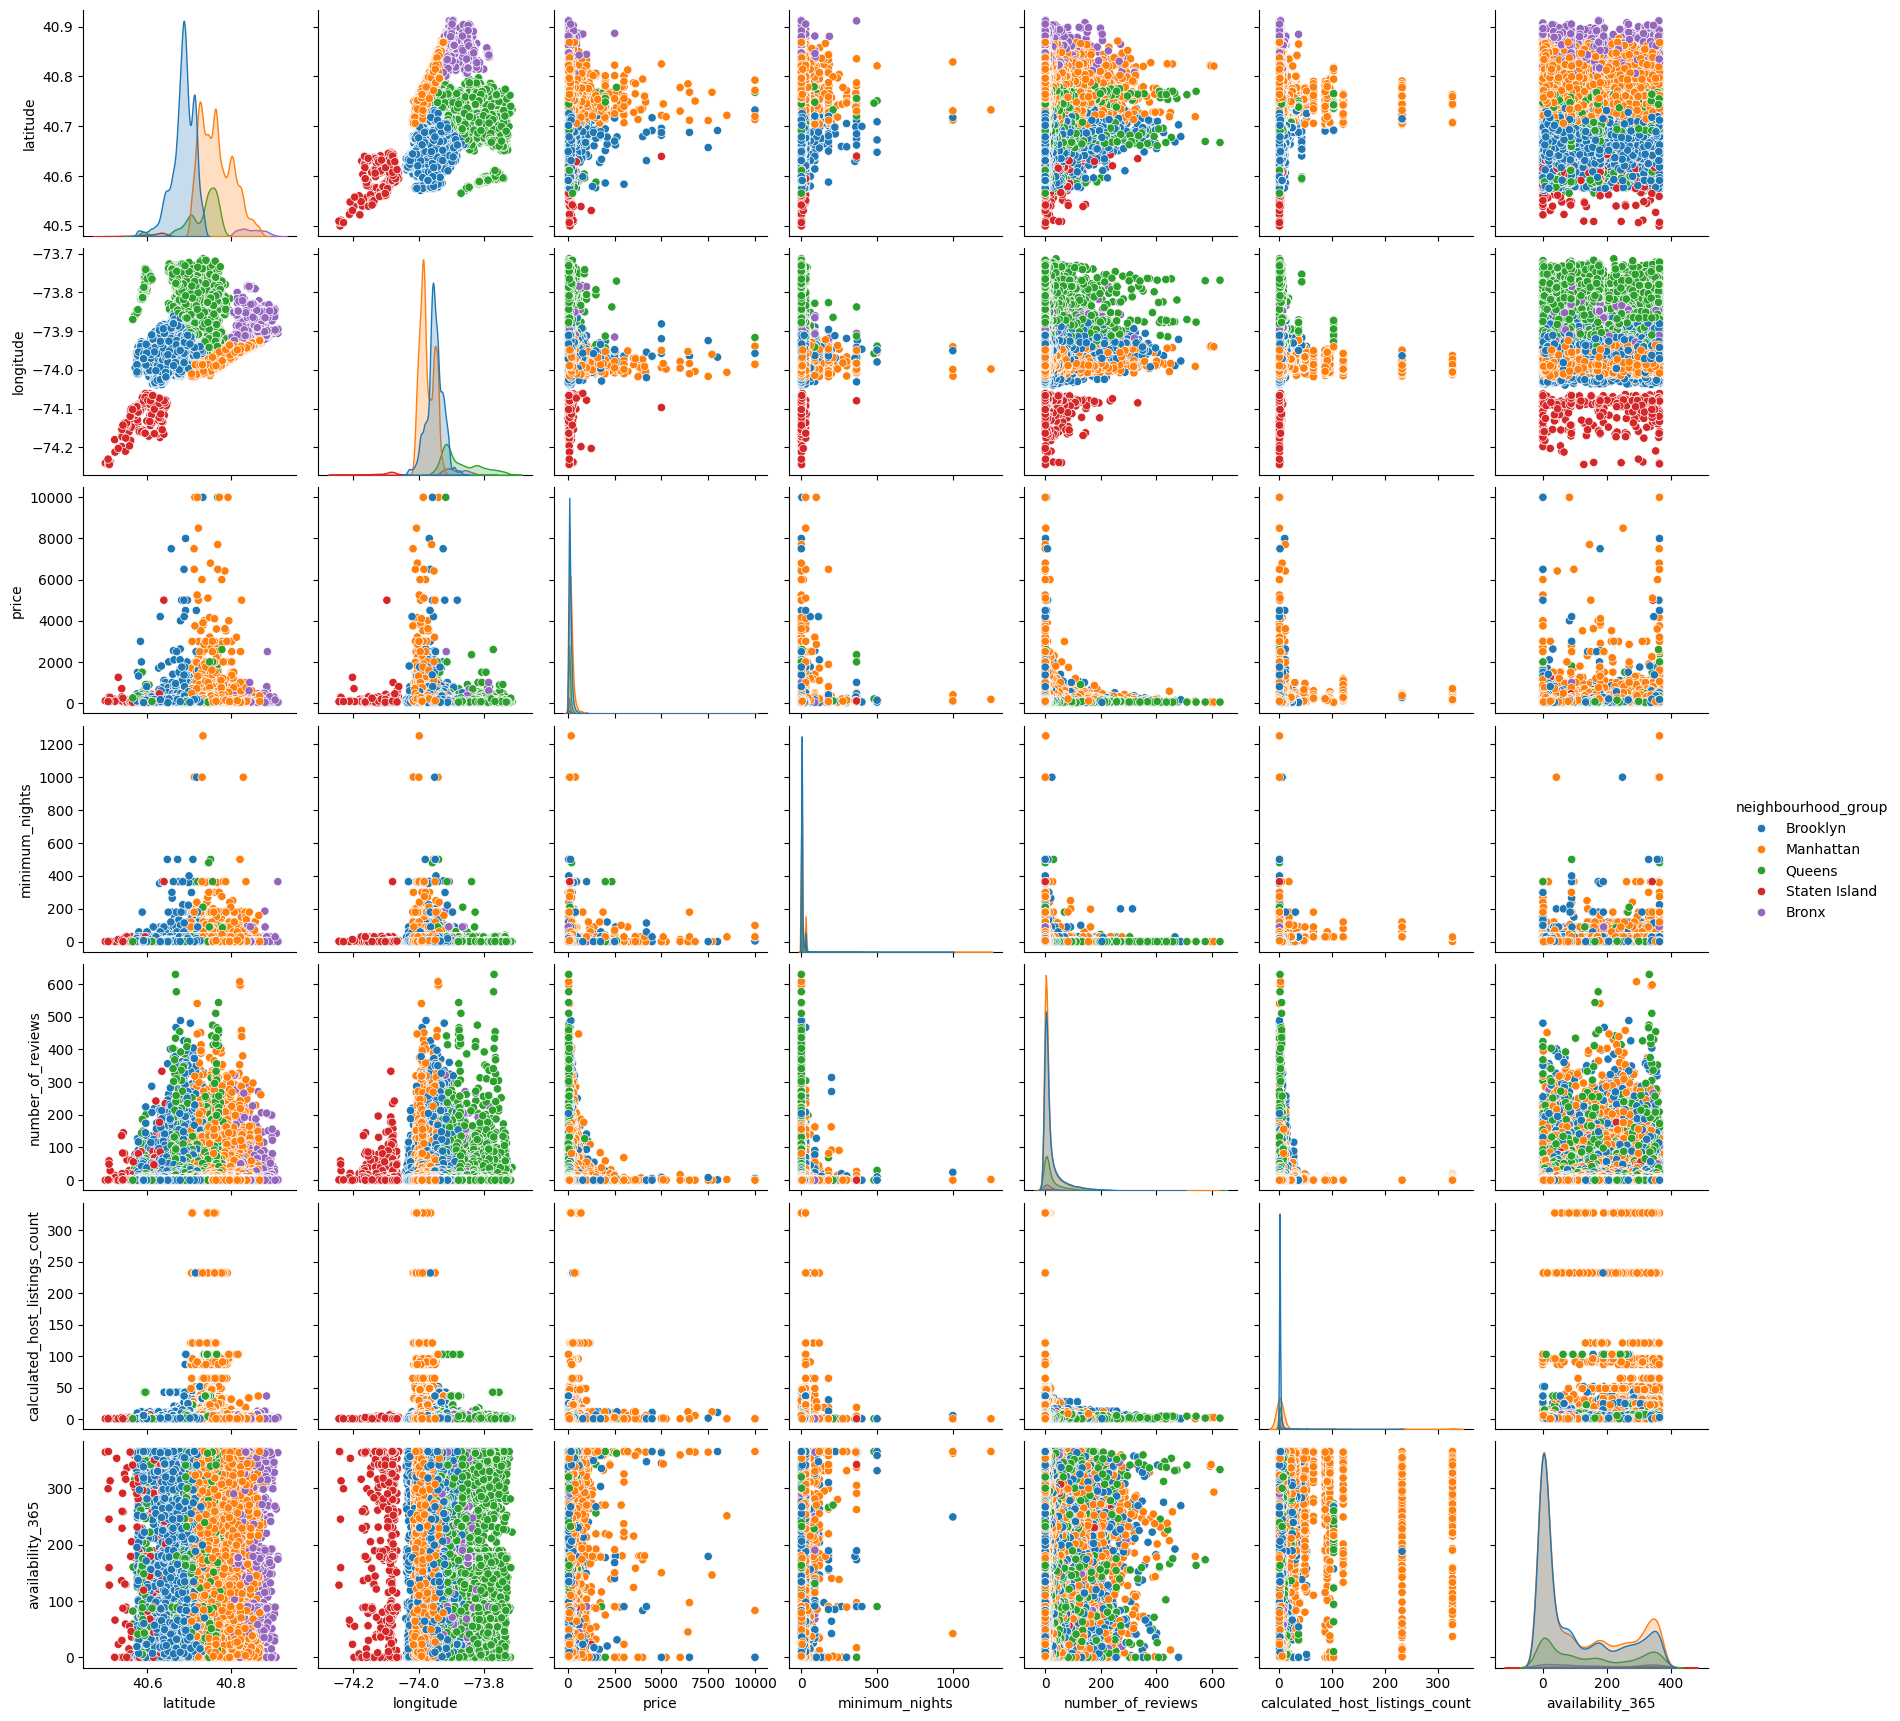

In [ ]:
#sns.pairplot(df, hue='neighbourhood_group')

## REGRESION LINEAL PRICE

In [90]:
df_ok.to_csv("df_ok.csv", index=False)


#### Probamos modelos de forma inidividual para ver cuáles dan mejores resultados antes del preprocesado. 

In [34]:

X = df_ok.drop('price', axis=1)
y = df_ok['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()

# Entrenamos sobre el 80 % de datos, es decir sobre los datos de entrenamiento
model.fit(X_train, y_train)

# Precedimos sobre el 20 % de datos, es decir, sobre los datos de test que el modelo no conoce
# y_pred son las predicciones que genera el modelo para X_test
y_pred = model.predict(X_test)

# Comparar los valores de y_test (reales) contra las predicciones del modelo y_pred (predicciones) para calcular el error
df_resultados=pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE'])
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

df_resultados_predictor = pd.DataFrame({
    'Modelo': f'RL múltiple (test 20 %)',
    'R2': [r2],
    'MAE': [mae],
    'RMSE': [rmse],
    'MAPE':[mape]
})

df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)

df_resultados

C:\Users\franc\AppData\Local\Temp\ipykernel_21948\102501149.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)


,Modelo,R2,MAE,RMSE,MAPE
0,RL múltiple (test 20 %),0.315491,0.196501,0.247687,0.043308


In [35]:
from xgboost import XGBRegressor

X = df_ok.drop('price', axis=1)
y = df_ok['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = XGBRegressor(n_estimators=200, learning_rate=0.3, max_depth=10, random_state=42, objective='reg:squarederror')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


df_resultados=pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE'])
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

df_resultados_predictor = pd.DataFrame({
    'Modelo': 'XGRB(test 20 %)',
    'R2': [r2],
    'MAE': [mae],
    'RMSE': [rmse],
    'MAPE':[mape]
})

df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)

df_resultados

C:\Users\franc\AppData\Local\Temp\ipykernel_21948\2074413343.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)


,Modelo,R2,MAE,RMSE,MAPE
0,XGRB(test 20 %),0.297827,0.196228,0.250862,0.043281


In [36]:
X = df_ok.drop('price', axis=1)
y = df_ok['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

df_resultados=pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE'])
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

df_resultados_predictor = pd.DataFrame({
    'Modelo': f'RForest(test 20 %)',
    'R2': [r2],
    'MAE': [mae],
    'RMSE': [rmse],
    'MAPE':[mape]
})

df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)

df_resultados

C:\Users\franc\AppData\Local\Temp\ipykernel_21948\3341030641.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)


,Modelo,R2,MAE,RMSE,MAPE
0,RForest(test 20 %),0.023622,0.237109,0.295816,0.052416


In [37]:

X = df_ok.drop('price', axis=1)
y = df_ok['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



model = DecisionTreeRegressor(max_depth=6, min_samples_split=2, min_samples_leaf=4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


df_resultados=pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE'])
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

df_resultados_predictor = pd.DataFrame({
    'Modelo': 'DecisionTree(test 20 %)',
    'R2': [r2],
    'MAE': [mae],
    'RMSE': [rmse],
    'MAPE':[mape]
})

df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)

df_resultados

C:\Users\franc\AppData\Local\Temp\ipykernel_21948\184527301.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)


,Modelo,R2,MAE,RMSE,MAPE
0,DecisionTree(test 20 %),0.345407,0.18938,0.242214,0.041757


In [38]:
#Este modelo, RandomForestRegresor es el que mejores datos devuelve en cuanto a R2 junto con DecisionTreeRegressor por lo que son los dos que vaos a usar para hacer la prediccion final.

X = df_ok.drop('price', axis=1)
y = df_ok['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = RandomForestRegressor(n_estimators=300, random_state=42, max_depth=10, min_samples_split=3, min_samples_leaf=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

df_resultados=pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE'])
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

df_resultados_predictor = pd.DataFrame({
    'Modelo': f'RForest(test 20 %)',
    'R2': [r2],
    'MAE': [mae],
    'RMSE': [rmse],
    'MAPE':[mape]
})

df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)

df_resultados

C:\Users\franc\AppData\Local\Temp\ipykernel_21948\2503851140.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)


,Modelo,R2,MAE,RMSE,MAPE
0,RForest(test 20 %),0.387409,0.183066,0.234314,0.040325


In [39]:

X = df_ok.drop('price', axis=1)
y = df_ok['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

df_resultados = pd.DataFrame(columns=['Modelo', 'Preprocesado', 'R2', 'MAE', 'RMSE', 'MAPE'])

def calculate_metrics(preprocessor_name, X_train, X_test, y_train, y_test):
    models = {
        'DecisionTree': DecisionTreeRegressor(max_depth=6, min_samples_split=2, min_samples_leaf=4, random_state=42),
        'RandomForest': RandomForestRegressor(n_estimators=300, random_state=42, max_depth=10, min_samples_split=3, min_samples_leaf=1)
    }
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        df_resultados.loc[len(df_resultados)] = [model_name, preprocessor_name, r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred),root_mean_squared_error(y_test, y_pred),mean_absolute_percentage_error(y_test, y_pred)]
    
    return df_resultados.sort_values('R2', ascending=False)

In [40]:
calculate_metrics('Sin preprocesado', X_train, X_test, y_train, y_test)



,Modelo,Preprocesado,R2,MAE,RMSE,MAPE
1,RandomForest,Sin preprocesado,0.387409,0.183066,0.234314,0.040325
0,DecisionTree,Sin preprocesado,0.345407,0.189380,0.242214,0.041757


### Escaladores

In [41]:
scaler = StandardScaler()
scaler.fit(X_train) # fit solo sobre train y no en test para evitar data leakage

X_train_scaled = scaler.transform(X_train) # devuelve un array de numpy
X_test_scaled = scaler.transform(X_test) # devuelve un array de numpy

# opcional, pasarlo a dataframes de pandas con los nombres de las columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_train_scaled.head(2)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.407462,-0.509126,-0.347108,-0.565570,-0.744634,-0.355319,-0.592827,-0.024436,1.551116,0.543472
1,0.231506,0.108797,-0.347108,-0.118735,0.450420,0.142974,1.986399,-0.024436,1.551116,0.543472


In [42]:
calculate_metrics('StandardScaler', X_train_scaled, X_test_scaled, y_train, y_test)

,Modelo,Preprocesado,R2,MAE,RMSE,MAPE
1,RandomForest,Sin preprocesado,0.387409,0.183066,0.234314,0.040325
3,RandomForest,StandardScaler,0.387342,0.183044,0.234327,0.040319
0,DecisionTree,Sin preprocesado,0.345407,0.189380,0.242214,0.041757
2,DecisionTree,StandardScaler,0.345407,0.189380,0.242214,0.041757


In [43]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_train_scaled.head(2)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.432667,0.360125,0.166667,0.000000,0.000000,0.000000,0.060274,0.25,0.972727,0.5
1,0.406718,0.416742,0.166667,0.046948,0.135714,0.030303,0.945205,0.25,0.972727,0.5


In [44]:
calculate_metrics('MinMaxScaler', X_train_scaled, X_test_scaled, y_train, y_test)

,Modelo,Preprocesado,R2,MAE,RMSE,MAPE
5,RandomForest,MinMaxScaler,0.387409,0.183081,0.234314,0.040328
1,RandomForest,Sin preprocesado,0.387409,0.183066,0.234314,0.040325
3,RandomForest,StandardScaler,0.387342,0.183044,0.234327,0.040319
0,DecisionTree,Sin preprocesado,0.345407,0.189380,0.242214,0.041757
2,DecisionTree,StandardScaler,0.345407,0.189380,0.242214,0.041757
4,DecisionTree,MinMaxScaler,0.345407,0.189380,0.242214,0.041757


In [45]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_train_scaled.head(2)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.725418,-0.420320,0.0,-0.269231,-0.271186,0.0,-0.005674,0.0,1.029412,0.0
1,0.494798,0.205792,0.0,0.500000,0.802260,1.0,1.826950,0.0,1.029412,0.0


In [46]:
calculate_metrics('RobustScaler', X_train_scaled, X_test_scaled, y_train, y_test)

,Modelo,Preprocesado,R2,MAE,RMSE,MAPE
5,RandomForest,MinMaxScaler,0.387409,0.183081,0.234314,0.040328
1,RandomForest,Sin preprocesado,0.387409,0.183066,0.234314,0.040325
7,RandomForest,RobustScaler,0.387371,0.183062,0.234321,0.040324
3,RandomForest,StandardScaler,0.387342,0.183044,0.234327,0.040319
2,DecisionTree,StandardScaler,0.345407,0.189380,0.242214,0.041757
0,DecisionTree,Sin preprocesado,0.345407,0.189380,0.242214,0.041757
4,DecisionTree,MinMaxScaler,0.345407,0.189380,0.242214,0.041757
6,DecisionTree,RobustScaler,0.345407,0.189380,0.242214,0.041757


### Transformadores

In [47]:
transformer = QuantileTransformer(output_distribution='normal')
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)


In [48]:
calculate_metrics('QuantileTransformer', X_train_transformed, X_test_transformed, y_train, y_test)

,Modelo,Preprocesado,R2,MAE,RMSE,MAPE
5,RandomForest,MinMaxScaler,0.387409,0.183081,0.234314,0.040328
1,RandomForest,Sin preprocesado,0.387409,0.183066,0.234314,0.040325
7,RandomForest,RobustScaler,0.387371,0.183062,0.234321,0.040324
3,RandomForest,StandardScaler,0.387342,0.183044,0.234327,0.040319
9,RandomForest,QuantileTransformer,0.386445,0.183100,0.234498,0.040329
0,DecisionTree,Sin preprocesado,0.345407,0.189380,0.242214,0.041757
4,DecisionTree,MinMaxScaler,0.345407,0.189380,0.242214,0.041757
2,DecisionTree,StandardScaler,0.345407,0.189380,0.242214,0.041757
6,DecisionTree,RobustScaler,0.345407,0.189380,0.242214,0.041757
8,DecisionTree,QuantileTransformer,0.345407,0.189380,0.242214,0.041757


In [49]:
X = df_ok.drop('price', axis=1)
y = df_ok['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [50]:
numerical_columns = X_train.select_dtypes(exclude=['object', 'category']).columns.to_list() # np.number alternativa
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

encoder = OneHotEncoder(sparse_output=False) # sparse_output=False para obtenerlo como matriz de 0s y 1s , probar drop='first'
X_train_encoded = encoder.fit_transform(X_train[categorical_columns]) # array de numpy con las codificaciones
X_test_encoded = encoder.transform(X_test[categorical_columns])

# pasarlo a dataframes de pandas y juntarlo con las numéricas para obtener resultado como pd.get_dummies
X_train_final = pd.concat(
    [
        pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out()).reset_index(drop=True), # categoricas
        X_train[numerical_columns].reset_index(drop=True) # numéricas
    ],
    axis=1
)
X_test_final = pd.concat(
    [
        pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out()).reset_index(drop=True), # categoricas
        X_test[numerical_columns].reset_index(drop=True) # numéricas
    ],
    axis=1
)

In [51]:
calculate_metrics('OneHotEncoder', X_train_final, X_test_final, y_train, y_test)

,Modelo,Preprocesado,R2,MAE,RMSE,MAPE
5,RandomForest,MinMaxScaler,0.387409,0.183081,0.234314,0.040328
1,RandomForest,Sin preprocesado,0.387409,0.183066,0.234314,0.040325
11,RandomForest,OneHotEncoder,0.387409,0.183066,0.234314,0.040325
7,RandomForest,RobustScaler,0.387371,0.183062,0.234321,0.040324
3,RandomForest,StandardScaler,0.387342,0.183044,0.234327,0.040319
9,RandomForest,QuantileTransformer,0.386445,0.183100,0.234498,0.040329
2,DecisionTree,StandardScaler,0.345407,0.189380,0.242214,0.041757
0,DecisionTree,Sin preprocesado,0.345407,0.189380,0.242214,0.041757
6,DecisionTree,RobustScaler,0.345407,0.189380,0.242214,0.041757
4,DecisionTree,MinMaxScaler,0.345407,0.189380,0.242214,0.041757


In [52]:
numerical_columns = X_train.select_dtypes(exclude=['object', 'category']).columns.to_list() # np.number alternativa
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

encoder = OneHotEncoder(sparse_output=False) # sparse_output=False para obtenerlo como matriz de 0s y 1s , probar drop='first'
X_train_encoded = encoder.fit_transform(X_train[categorical_columns]) # array de numpy con las codificaciones
X_test_encoded = encoder.transform(X_test[categorical_columns])

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

X_train_final = pd.concat(
    [
        pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out()).reset_index(drop=True), # categoricas
        pd.DataFrame(X_train_scaled, columns=numerical_columns).reset_index(drop=True) # numéricas
    ],
    axis=1
)
X_test_final = pd.concat(
    [
        pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out()).reset_index(drop=True), # categoricas
        pd.DataFrame(X_test_scaled, columns=numerical_columns).reset_index(drop=True) # numéricas
    ],
    axis=1
)

In [53]:
calculate_metrics('OneHotEncoder+MinMaxScaler', X_train_final, X_test_final, y_train, y_test)

,Modelo,Preprocesado,R2,MAE,RMSE,MAPE
5,RandomForest,MinMaxScaler,0.387409,0.183081,0.234314,0.040328
13,RandomForest,OneHotEncoder+MinMaxScaler,0.387409,0.183081,0.234314,0.040328
11,RandomForest,OneHotEncoder,0.387409,0.183066,0.234314,0.040325
1,RandomForest,Sin preprocesado,0.387409,0.183066,0.234314,0.040325
7,RandomForest,RobustScaler,0.387371,0.183062,0.234321,0.040324
3,RandomForest,StandardScaler,0.387342,0.183044,0.234327,0.040319
9,RandomForest,QuantileTransformer,0.386445,0.183100,0.234498,0.040329
4,DecisionTree,MinMaxScaler,0.345407,0.189380,0.242214,0.041757
0,DecisionTree,Sin preprocesado,0.345407,0.189380,0.242214,0.041757
2,DecisionTree,StandardScaler,0.345407,0.189380,0.242214,0.041757


Vemos que las metricas dejan bastante que desear. No hay correlación con el precio. Los datos no son nada servibles para la regresión.

###  Pipeline

In [54]:
label_encoder = LabelEncoder()
df['neighbourhood_group'] = label_encoder.fit_transform(df['neighbourhood_group'])
df['room_type'] = label_encoder.fit_transform(df['room_type'])
df['neighbourhood'] = label_encoder.fit_transform(df['neighbourhood'])


In [55]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [56]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', MinMaxScaler()),
    ('model', DecisionTreeRegressor())
])

params = {
    'imputer__strategy': ['mean', 'median'],
    'scaler__feature_range': [(0, 1), (0, 2)],
    'model__max_features': [200],
    'model__max_depth': [6],
    'model__min_samples_split': [2],
    'model__min_samples_leaf': [4],
    'model__random_state': [42]
}



grid = GridSearchCV(pipeline, params, scoring='r2', cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
print('r2_score', r2_score(y_test, y_pred))
print('grid best params', grid.best_params_)

r2_score 0.15490798198683953
grid best params {'imputer__strategy': 'mean', 'model__max_depth': 6, 'model__max_features': 200, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__random_state': 42, 'scaler__feature_range': (0, 1)}


In [57]:
X = df_ok.drop('price', axis=1)
y = df_ok['price']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Definir columnas numéricas y categóricas
num_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
cat_features = ['neighbourhood_group', 'neighbourhood', 'room_type']

# Preprocesamiento para variables numéricas (Imputación + Escalado)
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputa con la mediana
    ('scaler', StandardScaler())  # Escala los valores
])

# Preprocesamiento para variables categóricas (Codificación One-Hot)
cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Codifica variables categóricas
])
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Modelos de regresión con hiperparámetros para GridSearchCV
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor()
}

param_grid = {
    'Ridge': {'model__alpha': [0.1, 1, 10]},
    'Lasso': {'model__alpha': [0.001, 0.01, 0.1, 1]},
    'ElasticNet': {'model__alpha': [0.01, 0.1, 1], 'model__l1_ratio': [0.2, 0.5, 0.8]},
    'DecisionTree': {'model__max_depth': [5, 10, 15], 'model__min_samples_split': [2, 5, 10]},
    'RandomForest': {'model__n_estimators': [100, 300], 'model__max_depth': [10, 20], 'model__min_samples_split': [2, 5], 'model__min_samples_leaf': [1, 2]}
}

def evaluate_models():
    df_results = pd.DataFrame(columns=['Modelo', 'Mejor R2', 'Mejor Parámetros', 'MAE', 'RMSE'])

    for name, model in models.items():
        # Crear pipeline con preprocesador y modelo
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

        # Ejecutar GridSearchCV con validación cruzada
        grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Obtener las mejores predicciones
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        # Calcular métricas
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred) ** 0.5

        # Guardar los mejores resultados
        df_results = pd.concat([df_results, pd.DataFrame({
            'Modelo': [name],
            'Mejor R2': [r2],
            'Mejor Parámetros': [grid_search.best_params_],
            'MAE': [mae],
            'RMSE': [rmse]
        })], ignore_index=True)

    return df_results

# Ejecutar la evaluación de modelos
df_results = evaluate_models()

# Ordenar y mostrar resultados
df_results_sorted = df_results.sort_values('Mejor R2', ascending=False)
print(df_results_sorted)

C:\Users\franc\AppData\Local\Temp\ipykernel_21948\4174735757.py:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame({


         Modelo  Mejor R2                                   Mejor Parámetros  \
4  RandomForest  0.388635  {'model__max_depth': 10, 'model__min_samples_l...   
3  DecisionTree  0.349562  {'model__max_depth': 5, 'model__min_samples_sp...   
0         Ridge  0.349013                               {'model__alpha': 10}   
1         Lasso  0.337110                            {'model__alpha': 0.001}   
2    ElasticNet  0.328980     {'model__alpha': 0.01, 'model__l1_ratio': 0.2}   

        MAE      RMSE  
4  0.182550  0.234079  
3  0.189761  0.241444  
0  0.191498  0.241546  
1  0.194618  0.243744  
2  0.196631  0.245234  


Con el Pipeline no conseguimos mejores datos. Tampoco hehecho muchas variaciones pq tarda muchísimo.

## CLASIFICACIÓN  ROOM_TYPE

In [58]:
df_cl = pd.read_csv("df_ok.csv")

df_cl.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,40.68514,-73.95976,4.499810,1.0,270.0,4.64,1.0,194.0,1,41,0
1,40.66829,-73.98779,4.499810,4.0,167.0,1.34,3.0,314.0,1,182,1
2,40.70837,-73.95352,4.948760,2.0,148.0,1.20,1.0,46.0,1,214,0
3,40.67592,-73.94694,4.605170,3.0,53.0,4.44,1.0,21.0,1,51,0
4,40.68069,-73.97706,4.875197,2.0,130.0,1.09,6.0,347.0,1,151,1


In [59]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8835 entries, 0 to 8834
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        8835 non-null   float64
 1   longitude                       8835 non-null   float64
 2   price                           8835 non-null   float64
 3   minimum_nights                  8835 non-null   float64
 4   number_of_reviews               8835 non-null   float64
 5   reviews_per_month               8835 non-null   float64
 6   calculated_host_listings_count  8835 non-null   float64
 7   availability_365                8835 non-null   float64
 8   neighbourhood_group             8835 non-null   int64  
 9   neighbourhood                   8835 non-null   int64  
 10  room_type                       8835 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 759.4 KB


In [60]:
df_cl['room_type'].value_counts()

room_type
1    4515
0    3636
2     684
Name: count, dtype: int64

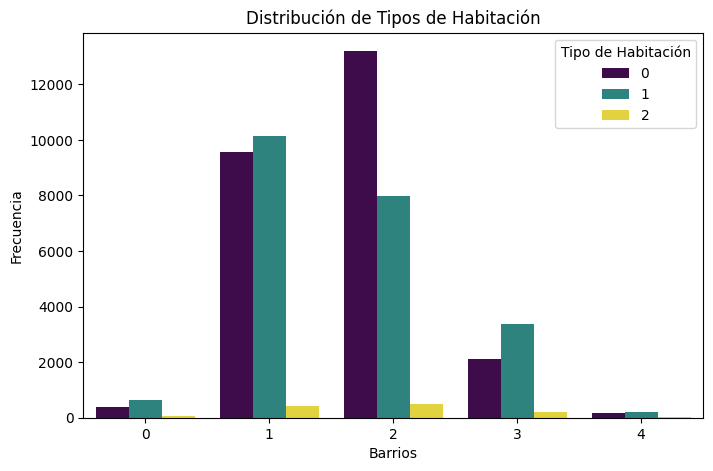

In [61]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['neighbourhood_group'], palette='viridis', hue=df['room_type'])  
plt.xlabel("Barrios")
plt.ylabel("Frecuencia")
plt.legend(title='Tipo de Habitación')
plt.title("Distribución de Tipos de Habitación")
plt.show()

In [62]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)


In [63]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  

In [64]:
df['room_type_encoded'] = label_encoder.fit_transform(df['room_type'])
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood'], drop_first=True)

In [65]:
X = df_encoded.drop(columns=['room_type_encoded'])
y = df_encoded['room_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
# Balanceo de clases con sobremuestreo
train_data = pd.concat([X_train, y_train], axis=1)
class_0 = train_data[train_data['room_type_encoded'] == 0]
class_1 = train_data[train_data['room_type_encoded'] == 1]
class_2 = train_data[train_data['room_type_encoded'] == 2]

max_size = max(len(class_0), len(class_1), len(class_2))
class_1_upsampled = resample(class_1, replace=True, n_samples=max_size, random_state=42)
class_2_upsampled = resample(class_2, replace=True, n_samples=max_size, random_state=42)
train_balanced = pd.concat([class_0, class_1_upsampled, class_2_upsampled])

X_train_resampled = train_balanced.drop(columns=['room_type_encoded'])
y_train_resampled = train_balanced['room_type_encoded']


numeric_features = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_resampled[numeric_features])

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
X_train_resampled['cluster_kmeans'] = kmeans.fit_predict(X_scaled)
X_test_scaled = scaler.transform(X_test[numeric_features])
X_test['cluster_kmeans'] = kmeans.predict(X_test_scaled)


imputer = SimpleImputer(strategy='mean')
X_train_resampled_imputed = imputer.fit_transform(X_train_resampled)

scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_train_resampled_imputed)

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled_pca)
n_components = X_pca.shape[1]

print(f"Número de componentes principales retenidas: {n_components}")


Número de componentes principales retenidas: 209


In [67]:
df_cl = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components)])

df_cl.head(2).T

,0,1
PC1,1.847727,-0.907847
PC2,-0.127157,-3.176253
PC3,-0.594395,0.145651
PC4,0.466716,1.307360
PC5,-0.482197,6.180576
...,...,...
PC205,-0.001044,0.061712
PC206,0.000420,-0.025405
PC207,-0.000634,0.018273
PC208,0.000183,0.015049


In [68]:
k_best = 30  
selector = SelectKBest(score_func=f_classif, k=k_best)
X_best = selector.fit_transform(df_cl, y_train_resampled)

# Convertir el resultado en DataFrame
df_cl = pd.DataFrame(X_best)

# Mostrar número de componentes principales retenidas
n_components = X_best.shape[1]
print(f"Número de mejores características seleccionadas: {n_components}")

df_cl.head(5)

Número de mejores características seleccionadas: 30


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.847727,-0.127157,-0.594395,0.466716,-0.482197,-1.042389,1.250380,0.862680,-0.510572,-0.351876,...,0.074942,-0.022210,-0.018292,0.065374,-0.034599,-0.129180,-0.008020,-0.010474,-0.007030,-0.035163
1,-0.907847,-3.176253,0.145651,1.307360,6.180576,0.868778,4.438229,-0.429645,0.354986,-0.350556,...,0.303099,3.847103,1.510908,-0.088312,2.237434,0.762101,2.593851,2.562783,-1.416679,-7.790082
2,2.009015,0.273536,-0.779422,-0.644710,-0.150965,-0.574923,0.788603,-0.146857,0.304100,-0.015568,...,0.060546,0.024397,0.016954,0.040361,0.007542,-0.065464,-0.015940,0.005575,0.003495,-0.019462
3,-1.304125,5.609644,0.197081,0.241696,1.517810,-2.371270,1.507832,-5.227944,0.018069,-1.279868,...,-0.511565,-1.184416,-0.243373,-0.258203,0.006776,0.086736,0.210868,0.156679,0.249596,-1.252150
4,-1.412021,-1.444634,-0.199154,0.756371,0.216809,-0.667835,0.659006,-1.132206,-0.252921,1.616940,...,-0.001443,0.272334,-0.109093,-0.122058,-0.072775,0.075956,-0.020447,0.018737,-0.012803,0.029228


In [69]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42, probability=True),
    'KNN': KNeighborsClassifier()
}

eval_metrics = []

for name, model in models.items():
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipeline.fit(X_train_resampled, y_train_resampled)
    y_pred = pipeline.predict(X_test)
    
    if hasattr(pipeline, "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        y_prob = None
        roc_auc = None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    eval_metrics.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'ROC AUC': roc_auc, 'Confusion Matrix': conf_matrix})

# Convertir métricas en DataFrame
df_metrics = pd.DataFrame(eval_metrics)
df_metrics.sort_values('Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1-score,ROC AUC,Confusion Matrix
1,SVM,1.000000,1.000000,1.000000,1.000000,1.000000,"[[5082, 0, 0], [0, 4465, 0], [0, 0, 232]]"
0,RandomForest,0.999591,0.999591,0.999591,0.999589,1.000000,"[[5082, 0, 0], [0, 4465, 0], [0, 4, 228]]"
2,KNN,0.972083,0.972077,0.972083,0.972074,0.980783,"[[4978, 100, 4], [125, 4320, 20], [2, 22, 208]]"


In [70]:
import joblib
from sklearn.impute import SimpleImputer

df_cl = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='linear', random_state=42, probability=True))
])
df_cl.fit(X_train_resampled, y_train_resampled)

# Guardar el modelo con joblib
joblib.dump(df_cl, 'svc_model.pkl')
print("Modelo SVC guardado como 'svc_model.pkl'")

Modelo SVC guardado como 'svc_model.pkl'


Esta clasificación vemos que da muchisimo mejor. 

## CLASIFICACIÓN CON RED NEURONAL

In [71]:
keras = tf.keras    

In [72]:
df = pd.read_csv('AB_NYC_2019.csv') 

In [73]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [74]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [75]:
df.drop(['id','name','host_id','host_name','last_review','reviews_per_month'], axis=1, inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


In [77]:
df.isnull().sum()   

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [78]:
X = df.drop('room_type', axis=1)
y = df['room_type']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [79]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_int = label_encoder.transform(y_train)
y_test_int = label_encoder.transform(y_test)

y_train_one_hot = to_categorical(y_train_int, num_classes=3)
y_test_one_hot = to_categorical(y_test_int, num_classes=3)

In [80]:
keras.backend.clear_session()
seed = 3  
tf.random.set_seed(3)
np.random.seed(3)
random.seed(3)

# Select only numeric columns
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

# 1 Arquitectura
model = keras.models.Sequential([
    keras.layers.Dense(384, input_shape=(X_train_numeric.shape[1],), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # Change the number of units to 3
])      

# 2. Compilación
model.compile(
    #loss=keras.losses.SparseCategoricalCrossentropy(),
    loss=keras.losses.CategoricalCrossentropy(),  # y_train_encoded
    optimizer=keras.optimizers.Adam(),
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')
        ]
)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 3. Entrenamiento

history = model.fit(
    X_train_numeric, y_train_one_hot, 
    validation_split=0.2,
    epochs=25,
    batch_size=35,
    verbose=1
)

    


Epoch 1/25


c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


895/895 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7719 - auc: 0.9042 - loss: 0.6550 - precision: 0.7738 - recall: 0.7686 - val_accuracy: 0.8092 - val_auc: 0.9328 - val_loss: 0.4902 - val_precision: 0.8100 - val_recall: 0.8071
Epoch 2/25
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8046 - auc: 0.9292 - loss: 0.5018 - precision: 0.8066 - recall: 0.8025 - val_accuracy: 0.8122 - val_auc: 0.9372 - val_loss: 0.4720 - val_precision: 0.8161 - val_recall: 0.8087
Epoch 3/25
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8095 - auc: 0.9342 - loss: 0.4791 - precision: 0.8114 - recall: 0.8068 - val_accuracy: 0.8174 - val_auc: 0.9386 - val_loss: 0.4638 - val_precision: 0.8198 - val_recall: 0.8143
Epoch 4/25
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8122 - auc: 0.9365 - loss: 0.4694 - precision: 0.8142 - recall: 0.8090 - val_accuracy: 0.8156 - val_auc: 0.9401 - val_loss: 0.4594 - val_precision: 0.8181 - val_recall: 0.8129
Epoch 5/25
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [81]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 384)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,891 (1.66 MB)

 Trainable params: 144,963 (566.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 289,928 (1.11 MB)

In [82]:
df_history = pd.DataFrame(history.history)
df_history.head().sort_values('loss')   

,accuracy,auc,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall
4,0.814138,0.938148,0.464454,0.816424,0.810814,0.818891,0.941039,0.457936,0.822883,0.813523
3,0.813307,0.936693,0.469963,0.815265,0.809664,0.815567,0.940129,0.459414,0.818112,0.812883
2,0.809632,0.934503,0.478762,0.812024,0.806756,0.817357,0.938573,0.463847,0.819843,0.814289
1,0.804710,0.930646,0.496336,0.806763,0.802122,0.812244,0.937172,0.471951,0.816071,0.808666
0,0.790617,0.918415,0.559466,0.792806,0.787486,0.809177,0.932841,0.490213,0.810031,0.807132


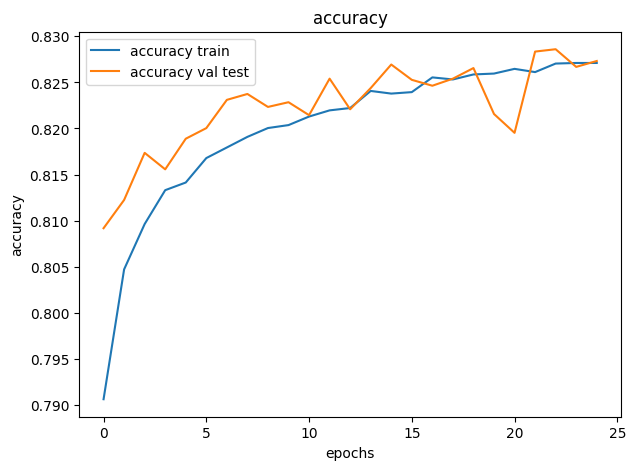

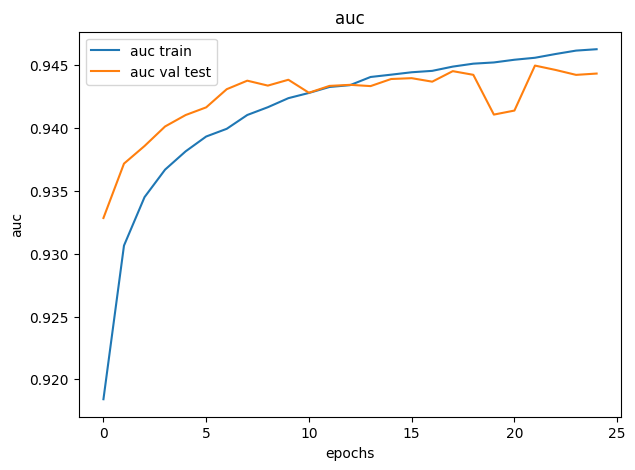

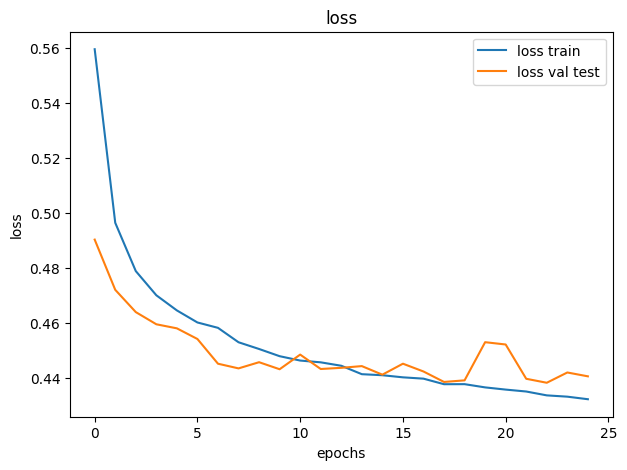

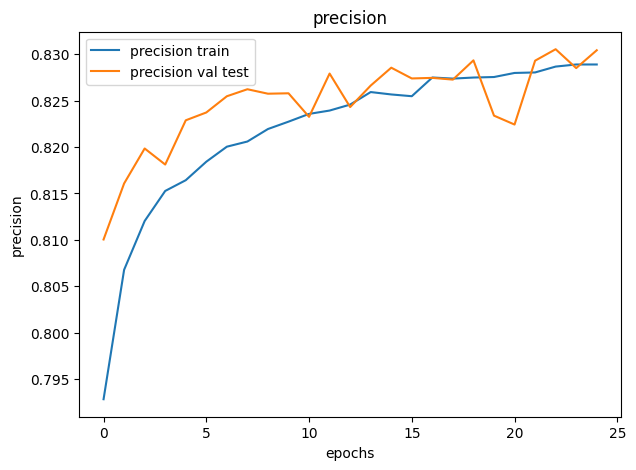

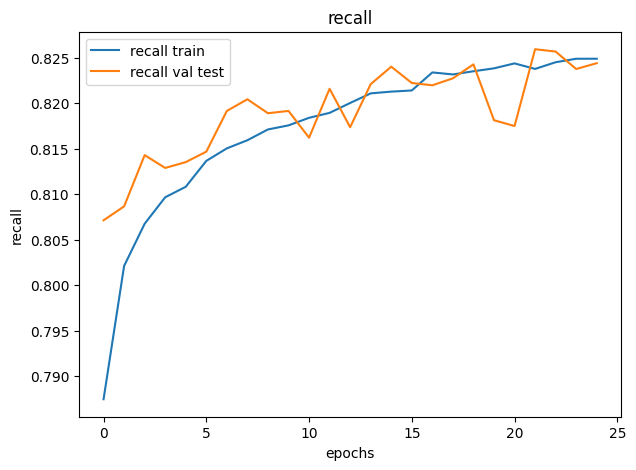

In [83]:
def plot_history(df_history):
    train_metrics = [col for col in df_history.columns if not col.startswith('val_')]
    for metric in train_metrics:
        plt.figure(figsize=(7, 5))
        plt.plot(df_history[metric], label=f'{metric} train')
        
        val_metric = f'val_{metric}'
        if val_metric in df_history.columns:
            plt.plot(df_history[val_metric], label=f'{metric} val test')
            
        plt.title(metric)
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        plt.show()
        
plot_history(df_history)

In [84]:
test_loss_bce, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(X_test_numeric, y_test_one_hot)
print('test_loss_bce', test_loss_bce)
print('test_accuracy', test_accuracy)
print('test_precision', test_precision)
print('test_recall', test_recall)
print('test_auc', test_auc)

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.8246 - auc: 0.9454 - loss: 0.4376 - precision: 0.8279 - recall: 0.8215
test_loss_bce 0.43855926394462585
test_accuracy 0.8245219588279724
test_precision 0.8276146054267883
test_recall 0.8213518857955933
test_auc 0.9449958205223083


In [85]:
model.predict(X_test_numeric[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0.0327642 , 0.94684196, 0.02039379],
       [0.17779765, 0.757538  , 0.0646643 ],
       [0.5633384 , 0.4218971 , 0.01476445],
       [0.06830553, 0.9063656 , 0.02532894],
       [0.42789578, 0.55978507, 0.01231918]], dtype=float32)

In [86]:
y_pred = model.predict(X_test_numeric)
y_pred_label = np.argmax(y_pred, axis=1)
y_pred_label[:5]

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step


array([1, 1, 0, 1, 1])

In [87]:
df_comparison = pd.DataFrame({'real':y_test, 'predicho':y_pred_label})
df_comparison.head(5)

,real,predicho
15603,Private room,1
5781,Private room,1
40927,Entire home/apt,0
42211,Private room,1
44056,Entire home/apt,1


Con la red neuronal salen mejores datos, aunque el loss sigue sin ser muy bueno.  